# Session 5 Outline 
- Re-look at the code that we worked on in Assignment 4 (the fixed version).
- Move the contents of the code to the following files:
    - model.py
    - utils.py
    - S5.ipynb

- Make the whole code run again. 
- Upload the code with the 3 files + README.md file (total 4 files) to GitHub. README.md (look at the spelling) must have details about this code and how to read your code (what file does what). Heavy negative scores for not formatting your markdown file into p, H1, H2, list, etc. 
- Attempt Assignment 5. 

CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import warnings
warnings.filterwarnings("ignore")
import logging

logging.getLogger("tensorflow").setLevel(logging.WARNING)

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? False


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))#,((0.1407,), (0.4081,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

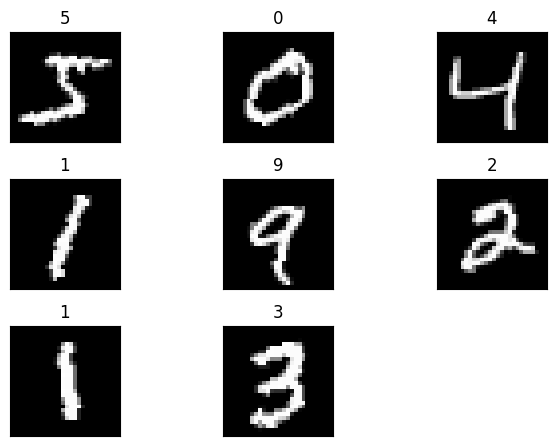

In [6]:
from utils import plot_images
plot_images(train_loader=train_loader)

CODE BLOCK: 7

In [7]:
from model import Net, print_summary

model = Net()
print_summary(model=model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from model import model_train, model_test

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 2

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train(model, device, train_loader, optimizer, train_acc=train_acc, train_losses=train_losses)
  model_test(model, device, test_loader, test_acc= test_acc, test_losses=test_losses) #train_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/118 [00:00<?, ?it/s]

Train: Loss=0.5207 Batch_id=117 Accuracy=47.60: 100%|██████████| 118/118 [05:47<00:00,  2.94s/it]


Test set: Average loss: 0.3418, Accuracy: 8873/10000 (88.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.3420 Batch_id=117 Accuracy=92.69: 100%|██████████| 118/118 [05:36<00:00,  2.86s/it]


Test set: Average loss: 0.0997, Accuracy: 9670/10000 (96.70%)

Adjusting learning rate of group 0 to 1.0000e-02.


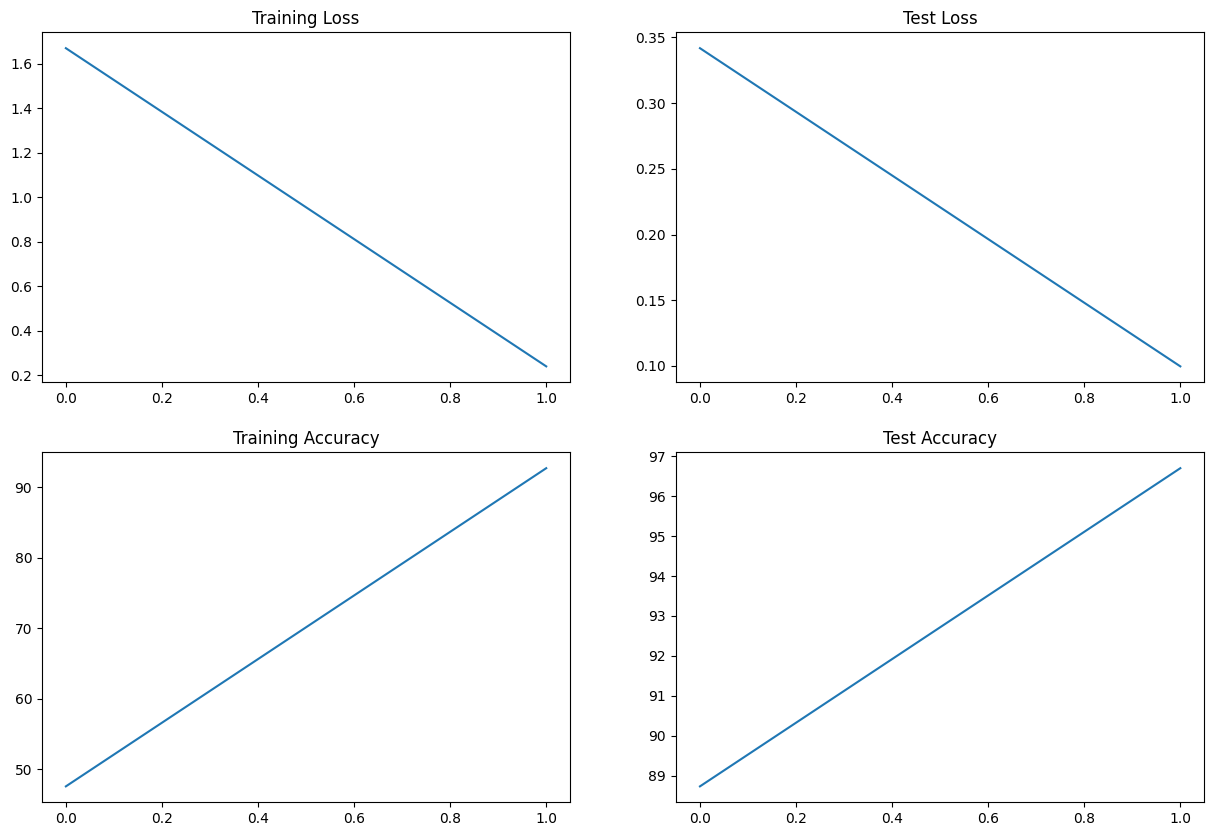

In [10]:
from utils import plot_train_test
plot_train_test(train_losses,train_acc,test_losses,test_acc)